<a href="https://colab.research.google.com/github/BenBuchanan2001/BenBuchanan2001/blob/main/Heart_Disease_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Loading & Basic Exploration

This section handles:
- Importing libraries
- Uploading the heart.dat file (if running in Colab)
- Reading the dataset into a DataFrame
- Renaming columns
- Initial data inspection (head, info, etc.)

In [120]:
# Uploading my data file
from google.colab import files
uploaded = files.upload()

Saving heart.dat to heart (8).dat


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# 1.2. Read the Data
# Make sure 'heart.csv' has been uploaded or is available in your path.
heart = pd.read_csv('heart.csv')

# 1.3. Rename Columns for Clarity
heart.columns = [
    "age", "sex", "chest_pain", "rest_bp", "cholesterol",
    "fasting_bs", "rest_ecg", "max_hr", "exang", "oldpeak",
    "slope", "vessels", "thal", "target"
]

# 1.4. Quick Inspection
print("Data Shape:", heart.shape)
display(heart.head())
print("\nData Info:")
print(heart.info())

Data Shape: (270, 14)


,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_hr,exang,oldpeak,slope,vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          270 non-null    float64
 1   sex          270 non-null    float64
 2   chest_pain   270 non-null    float64
 3   rest_bp      270 non-null    float64
 4   cholesterol  270 non-null    float64
 5   fasting_bs   270 non-null    float64
 6   rest_ecg     270 non-null    float64
 7   max_hr       270 non-null    float64
 8   exang        270 non-null    float64
 9   oldpeak      270 non-null    float64
 10  slope        270 non-null    float64
 11  vessels      270 non-null    float64
 12  thal         270 non-null    float64
 13  target       270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB
None


# 2. Data Preprocessing & Exploration

Here we:
- (Optional) Remap the target column if needed (e.g., {1:0, 2:1})
- Inspect the data with summaries, histograms, and count plots
- Possibly do correlation heatmaps, pairplots, or any other EDA.


Preview of the dataset after (optional) remap:


,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_hr,exang,oldpeak,slope,vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1



Summary Statistics:


,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_hr,exang,oldpeak,slope,vessels,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


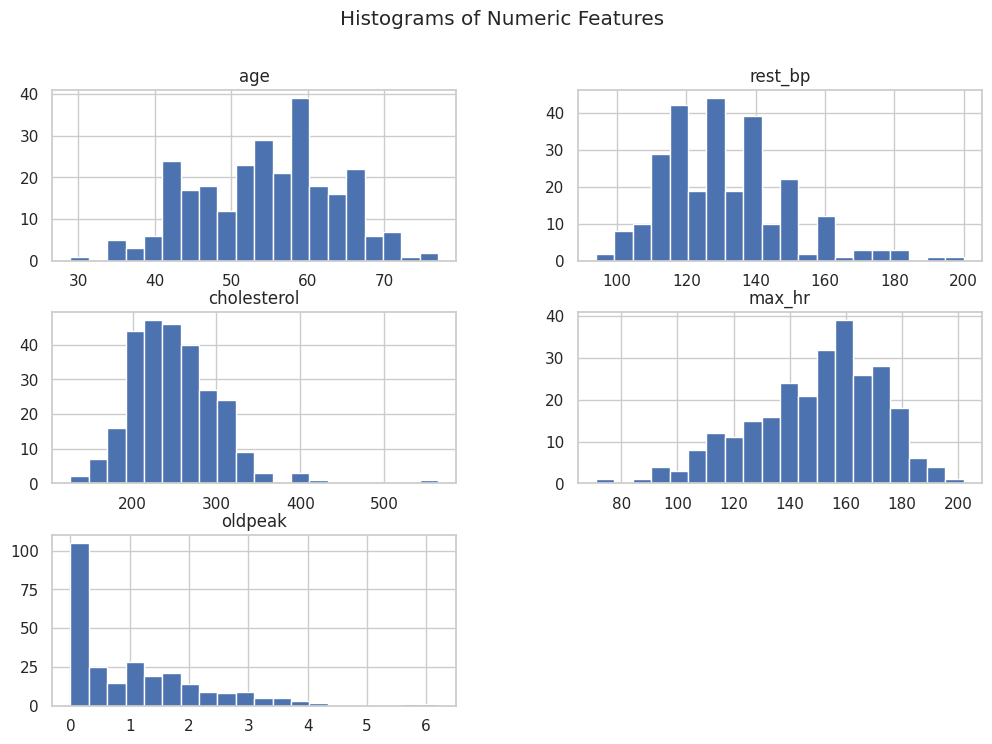

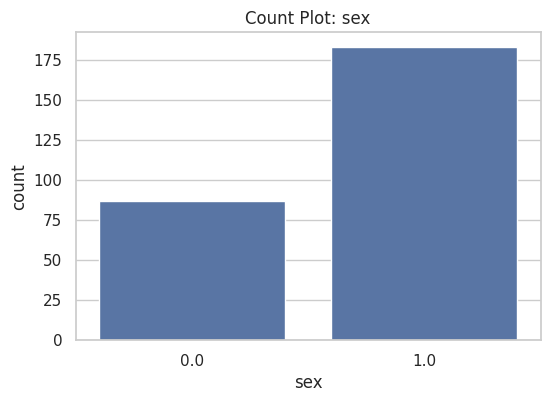

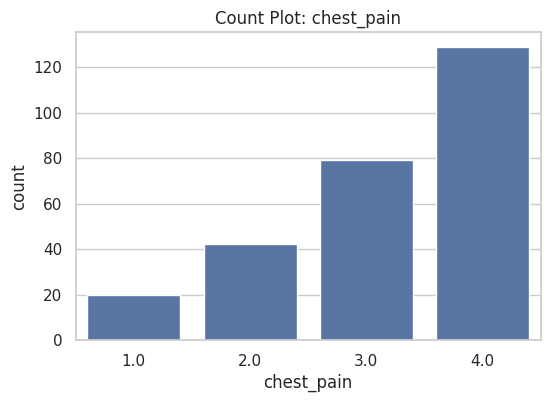

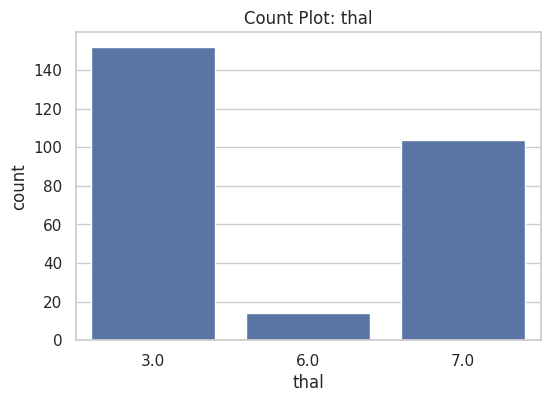

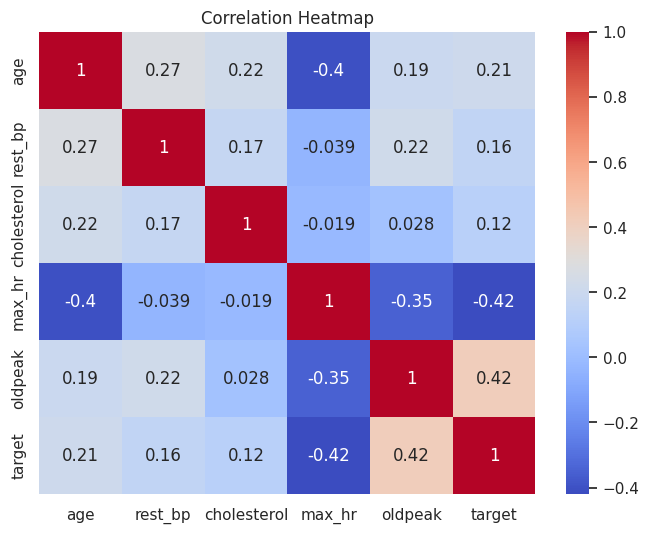

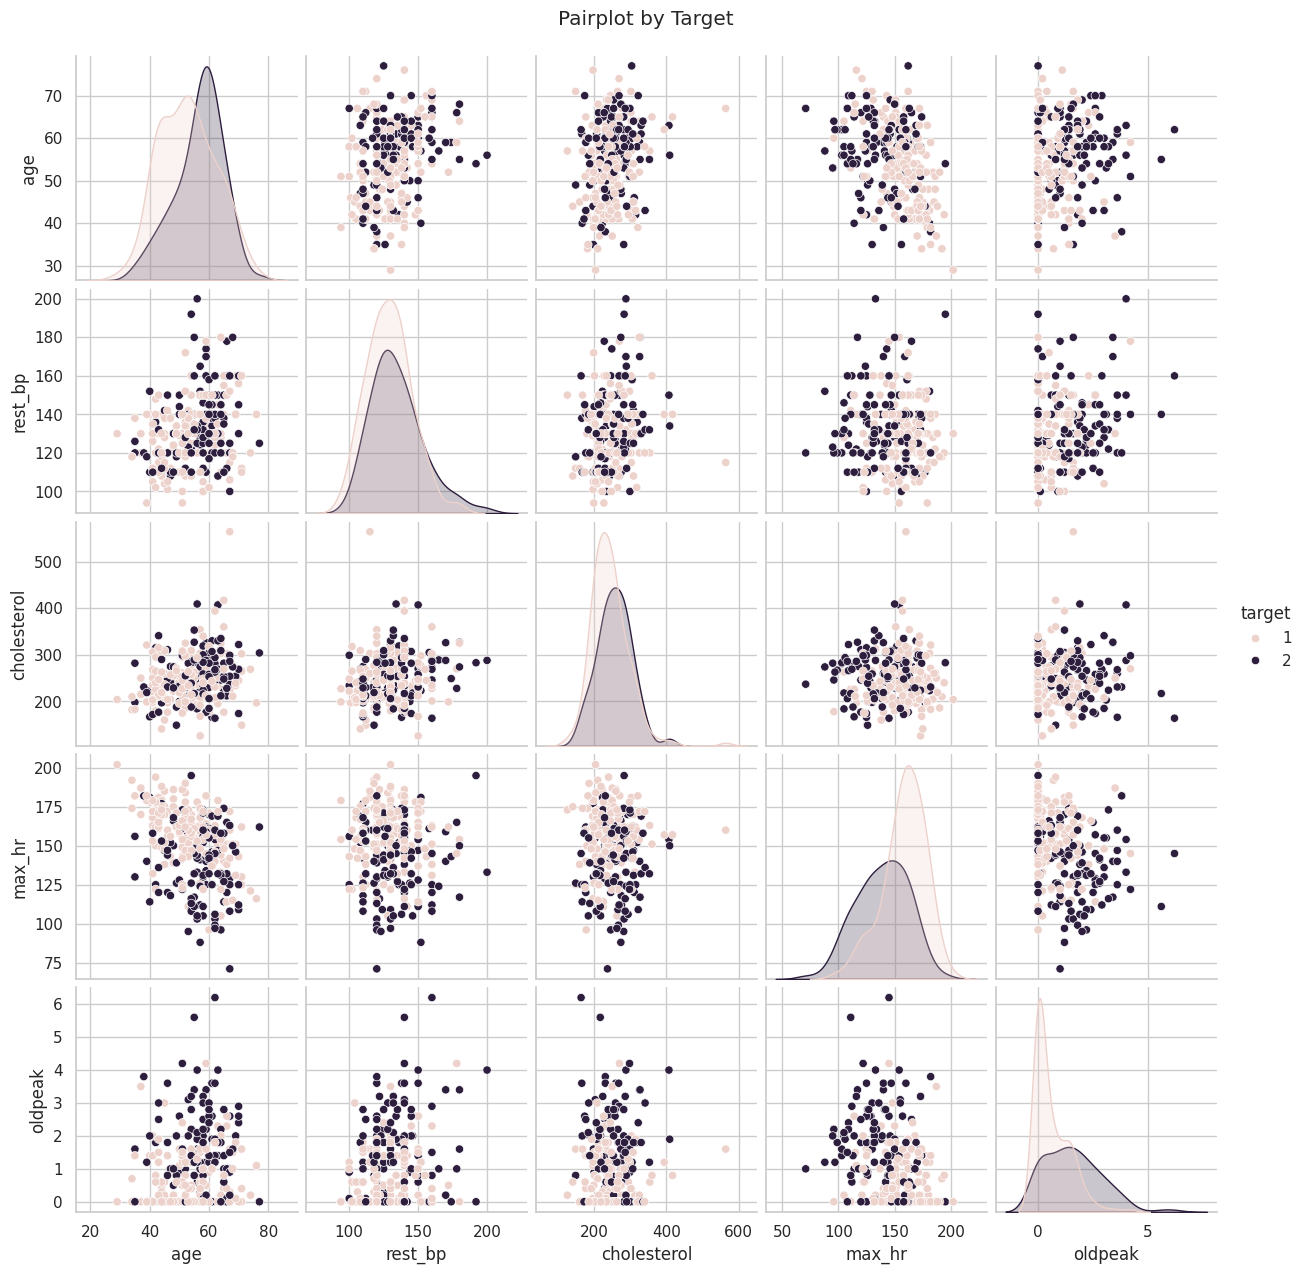

In [126]:
# 2.1. (Optional) Remap Target if your dataset uses {1,2} for classes
# heart["target"] = heart["target"].map({1:0, 2:1})

print("\nPreview of the dataset after (optional) remap:")
display(heart.head())

print("\nSummary Statistics:")
display(heart.describe())

numeric_features = ["age", "rest_bp", "cholesterol", "max_hr", "oldpeak"]
heart[numeric_features].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()

categorical_features = [
    "sex", "chest_pain", "fasting_bs", "rest_ecg",
    "exang", "slope", "vessels", "thal"
]

for col in ["sex", "chest_pain", "thal"]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=heart)
    plt.title(f"Count Plot: {col}")
    plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(heart[numeric_features + ["target"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(heart, vars=numeric_features, hue="target", diag_kind="kde")
plt.suptitle("Pairplot by Target", y=1.02)
plt.show()

# 3. Data Preprocessing Pipeline

Here we define:
- Which columns are numeric vs. categorical
- Pipelines for numeric (imputation + scaling)
- Pipelines for categorical (imputation + one-hot encoding)
- A ColumnTransformer to combine these pipelines

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Make a copy of the heart DataFrame if you prefer working with 'df'
df = heart.copy()

# 3.1. Separate Features and Target
X = df.drop("target", axis=1)
y = df["target"]

numeric_features = ["age", "rest_bp", "cholesterol", "max_hr", "oldpeak"]
categorical_features = ["sex", "chest_pain", "fasting_bs", "rest_ecg", "exang",
                        "slope", "vessels", "thal"]

# 3.2. Create Pipelines for Numeric & Categorical
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# 3.3. Combine into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# 4. Train/Test Split

We split the data into training and test sets, using stratify to preserve class balance.

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (216, 13)
Test set shape: (54, 13)


# 5. Model Building & Hyperparameter Tuning

- Build a pipeline that includes the 'preprocessor' plus a RandomForestClassifier
- Use GridSearchCV (or RandomizedSearchCV) to fine-tune hyperparameters

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 5.1. Create a pipeline for Random Forest
rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# 5.2. Define parameter grid
param_grid_rf = {
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5]
}

# 5.3. GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)
print("Best parameters found:", grid_search_rf.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search_rf.best_score_ * 100))

Best parameters found: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation accuracy: 83.33%


# 6. Model Evaluation & Visualization

We evaluate the best model with:
- Accuracy on the test set
- Confusion Matrix & Classification Report
- ROC Curve, Precision-Recall Curve

Test set accuracy: 81.48%
Confusion Matrix:
 [[25  5]
 [ 5 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.79      0.79      0.79        24

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



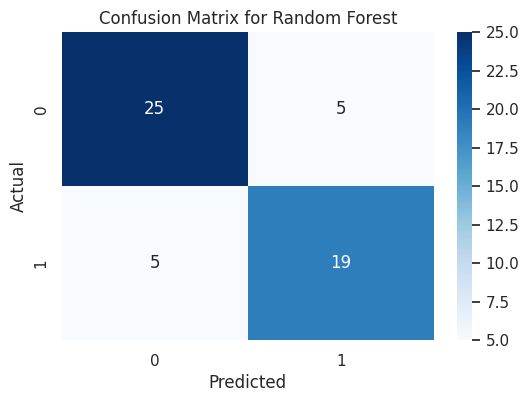

In [162]:
# %% [code]
# Evaluate the best model on the test set
test_accuracy = grid_search_rf.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(test_accuracy * 100))

# Get predictions on the test set
y_pred = grid_search_rf.predict(X_test)

# Print confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [157]:
# %% [code]
# Model Pipeline: Random Forest with GridSearchCV
rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid=param_grid_rf,
                              cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best parameters:", grid_search_rf.best_params_)
print("Best CV Accuracy: {:.2f}%".format(grid_search_rf.best_score_ * 100))

Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best CV Accuracy: 83.33%


Test set accuracy: 81.48%
Confusion Matrix:
 [[25  5]
 [ 5 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.79      0.79      0.79        24

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



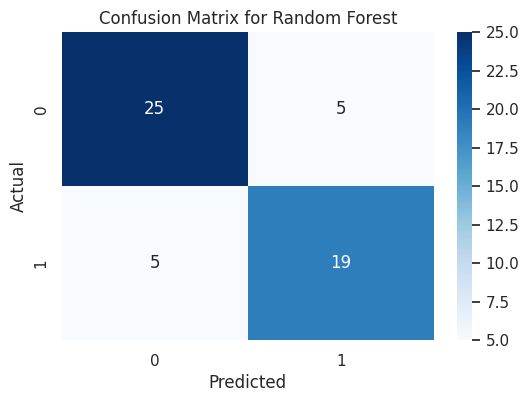

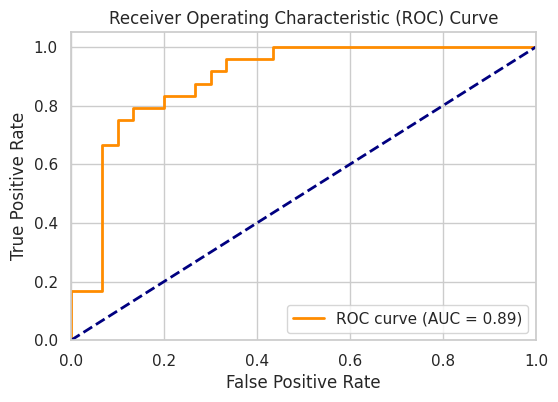

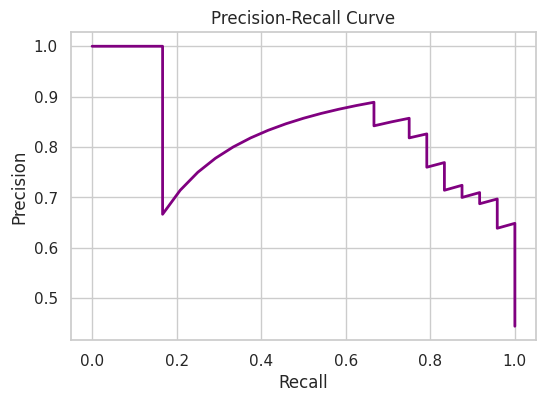

In [159]:
# %% [code]
# Evaluate the best model on the test set
test_accuracy = grid_search_rf.score(X_test, y_test)
print("Test set accuracy: {:.2f}%".format(test_accuracy * 100))

y_pred = grid_search_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# %% [code]
# Plot ROC Curve and calculate AUC for the best Random Forest model
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = grid_search_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


# Plot Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color="purple", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# 7. Feature Importance & SHAP (Optional)

- Retrieve feature importances from the best Random Forest
- Use SHAP for interpretability (install shap if needed)

In [160]:
# Installing SHAP
!pip install shap

Top 10 Important Features:


,Feature,Importance
10,chest_pain_4.0,0.098364
25,thal_3.0,0.090512
21,vessels_0.0,0.087193
4,oldpeak,0.078311
27,thal_7.0,0.073149
3,max_hr,0.067558
0,age,0.063108
2,cholesterol,0.057847
1,rest_bp,0.056020
19,slope_2.0,0.048507


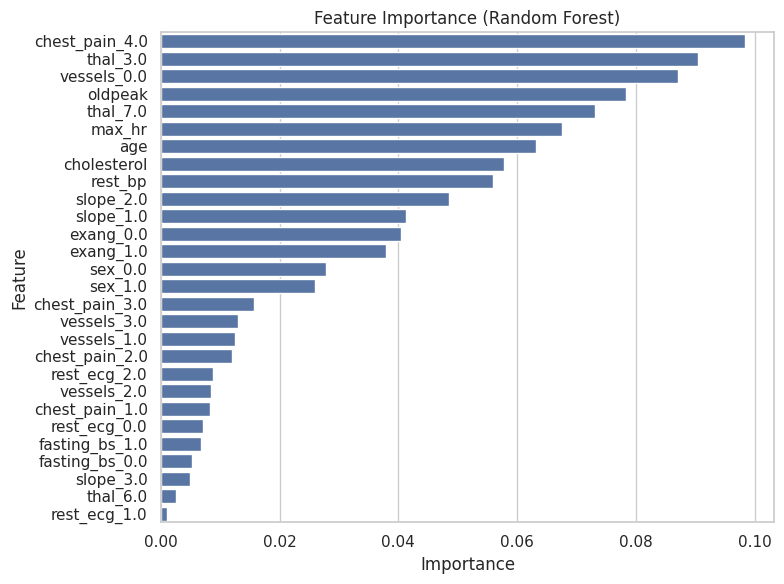

<Figure size 640x480 with 0 Axes>

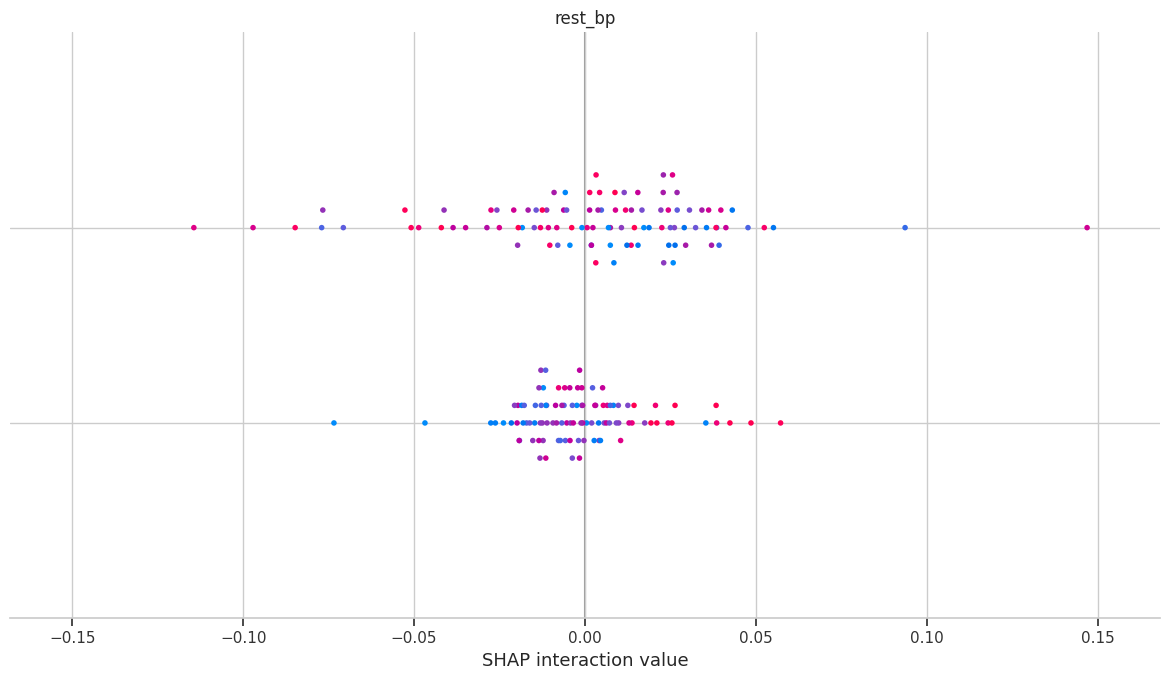

from matplotlib import pyplot as plt
_df_0['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [163]:
import shap

# 7.1. Feature Importance
best_rf = grid_search_rf.best_estimator_.named_steps["classifier"]

encoded_cat = (grid_search_rf.best_estimator_
               .named_steps["preprocessing"]
               .transformers_[1][1]
               .named_steps["onehot"]
               .get_feature_names_out(categorical_features))
all_feature_names = numeric_features + list(encoded_cat)

importances = best_rf.feature_importances_
feat_imp_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print("Top 10 Important Features:")
display(feat_imp_df.head(10))

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# 7.2. SHAP Analysis (If you want to run it)
try:
    X_sample = grid_search_rf.best_estimator_.named_steps["preprocessing"].transform(X_train.iloc[:100])
    explainer = shap.TreeExplainer(best_rf)
    shap_values = explainer.shap_values(X_sample)
    shap.summary_plot(shap_values, X_sample, feature_names=all_feature_names)
except Exception as e:
    print("SHAP analysis could not be completed:", e)

# 8. Additional Experiments

Examples:
- RandomizedSearchCV vs. GridSearchCV
- Feature engineering (heart_rate_reserve)
- RFE (feature selection)
- Ensemble methods (VotingClassifier)
- Comparing ExtraTrees with RandomForest

In [164]:
# 8.1. RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_distributions_rf = {
    "classifier__n_estimators": [50, 100, 150, 200],
    "classifier__max_depth": [None, 5, 10, 15],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_distributions_rf,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train, y_train)
print("Best parameters (random search):", random_search_rf.best_params_)
print("Best CV Accuracy (random search): {:.2f}%".format(random_search_rf.best_score_ * 100))

Best parameters (random search): {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': None}
Best CV Accuracy (random search): 83.79%


In [165]:
# 8.2. Feature Engineering (Example)
df["heart_rate_reserve"] = df["max_hr"] - df["rest_bp"] * 0.1
print("Added 'heart_rate_reserve' feature.")
display(df.head())

Added 'heart_rate_reserve' feature.


,age,sex,chest_pain,rest_bp,cholesterol,fasting_bs,rest_ecg,max_hr,exang,oldpeak,slope,vessels,thal,target,heart_rate_reserve
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,0.0,96.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,NaN,148.5
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,0.0,128.6
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,NaN,92.2
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,NaN,109.0


In [166]:
# 8.3. Feature Selection via RFE
from sklearn.feature_selection import RFE

selector = RFE(RandomForestClassifier(random_state=42), n_features_to_select=8)
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]
print("Selected Features via RFE:", selected_features.tolist())

Selected Features via RFE: ['age', 'chest_pain', 'rest_bp', 'cholesterol', 'max_hr', 'oldpeak', 'vessels', 'thal']


In [167]:
# 8.4. VotingClassifier (Combine multiple models)
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

rf_model = grid_search_rf.best_estimator_.named_steps["classifier"]
log_model = LogisticRegression(max_iter=1000, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', Pipeline([("preprocessing", preprocessor), ("classifier", rf_model)])),
        ('log', Pipeline([("preprocessing", preprocessor), ("classifier", log_model)])),
        ('knn', Pipeline([("preprocessing", preprocessor), ("classifier", knn_model)]))
    ],
    voting='hard',
    n_jobs=-1
)

voting_clf.fit(X_train, y_train)
print("Voting Classifier Test Accuracy:", voting_clf.score(X_test, y_test))

Voting Classifier Test Accuracy: 0.8888888888888888


In [168]:
# 8.5. Compare ExtraTrees with RandomForest
from sklearn.ensemble import ExtraTreesClassifier

et_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", ExtraTreesClassifier(random_state=42))
])

param_grid_et = {
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2]
}

grid_search_et = GridSearchCV(
    et_pipeline,
    param_grid=param_grid_et,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid_search_et.fit(X_train, y_train)

print("Best parameters (ExtraTrees):", grid_search_et.best_params_)
print("Best CV Accuracy (ExtraTrees): {:.2f}%".format(grid_search_et.best_score_ * 100))

test_accuracy_rf = grid_search_rf.score(X_test, y_test)
test_accuracy_et = grid_search_et.score(X_test, y_test)
print("Test Accuracy - Random Forest: {:.2f}%".format(test_accuracy_rf * 100))
print("Test Accuracy - Extra Trees: {:.2f}%".format(test_accuracy_et * 100))

Best parameters (ExtraTrees): {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best CV Accuracy (ExtraTrees): 83.34%
Test Accuracy - Random Forest: 81.48%
Test Accuracy - Extra Trees: 83.33%


# 9. Final Metrics & Reports

This final section shows further metrics (e.g., F1-score) and classification report,
or any additional data you want to highlight for your best model.

In [169]:
from sklearn.metrics import f1_score

y_pred_rf = grid_search_rf.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)
print("F1-score (Random Forest):", f1_rf)

print("\nFinal Classification Report (RF):")
print(classification_report(y_test, y_pred_rf))

F1-score (Random Forest): 0.7916666666666666

Final Classification Report (RF):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.79      0.79      0.79        24

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54

